## 2. Using numpy.random generate arrays of: 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy

In [2]:
# 1000 samples of uniform distribution on interval [0, 1]
uni_distr = np.random.uniform(0, 1, 1000)

In [3]:
# 1000 samples of normal distribution with mean 0 and standard deviation 1.
norm_distr1 = np.random.normal(0, 1, 1000)

In [4]:
# 1000 samples of normal distribution with mean 0 and standard deviation 10.
norm_distr2 = np.random.normal(0, 10, 1000)

In [5]:
# 1000 samples of beta distribution for the following pairs of parameters (1, 1) (2, 2) (3, 9) 
beta = np.random.beta([1, 2, 3], [1, 2, 9], (1000, 3))

In [6]:
# 10000 samples of two-dimensional normal distributions each with mean [0, 0].T and covariance matrices [[1, 0], [0, 1]], [[2, 1], [1, 2]]
mean = [0, 0]
cov1 = [[1, 0], [0, 1]]
cov2 = [[2, 1], [1, 2]]
norm_distr2d_1 = np.random.multivariate_normal(mean, cov1, 10000)
norm_distr2d_2 = np.random.multivariate_normal(mean, cov2, 10000)

## 3.For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).

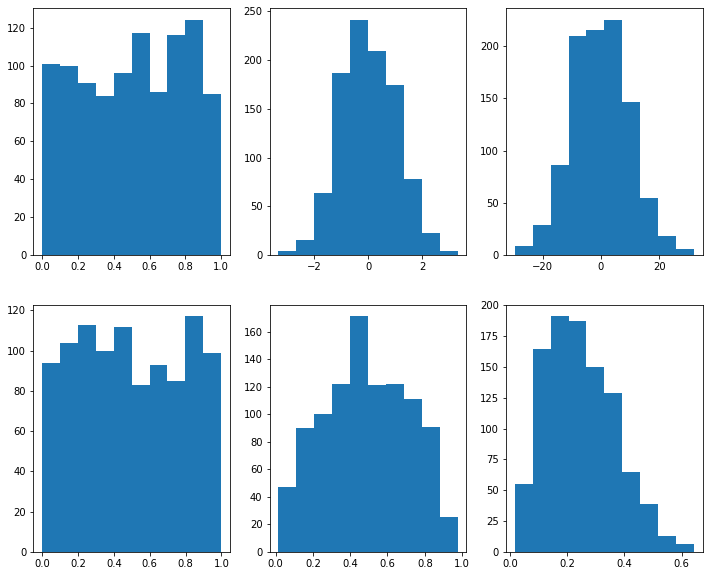

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.set_size_inches(12, 10)
ax1.hist(uni_distr)
ax2.hist(norm_distr1)
ax3.hist(norm_distr2)
ax4.hist(beta[:, 0])
ax5.hist(beta[:, 1])
ax6.hist(beta[:, 2])
plt.show()

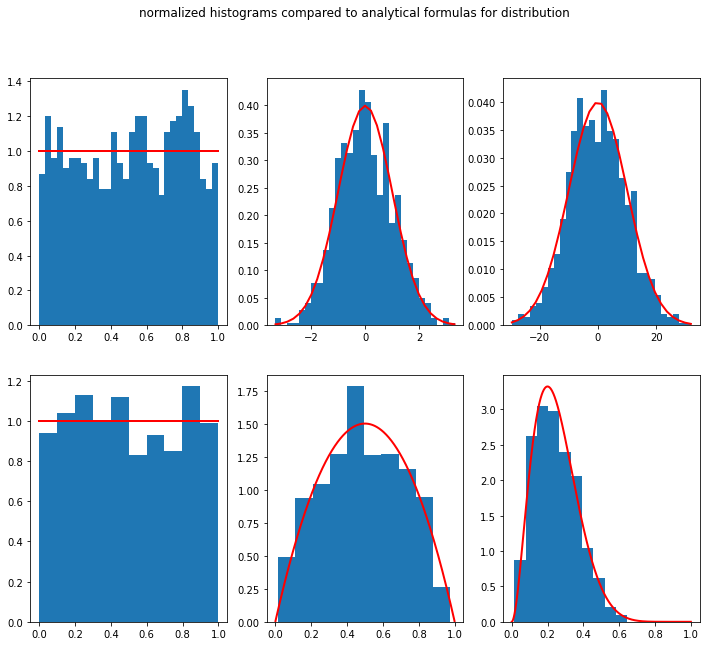

In [8]:
# normalized histograms compared to analytical formulas for distribution
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.set_size_inches(12, 10)
plt.suptitle('normalized histograms compared to analytical formulas for distribution')
x = np.linspace(0, 1, 1002)[1:-1]
count, bins, ignored = ax1.hist(uni_distr, 30, density=True)
ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
count, bins, ignored = ax2.hist(norm_distr1, 30, density=True)
ax2.plot(bins, 1/(1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0)**2 / (2 * 1**2) ), linewidth=2, color='r')
count, bins, ignored = ax3.hist(norm_distr2, 30, density=True)
ax3.plot(bins, 1/(10 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0)**2 / (2 * 10**2) ), linewidth=2, color='r')
ax4.hist(beta[:, 0], density=True)
dist = scipy.stats.beta(1, 1)
ax4.plot(x, dist.pdf(x), linewidth=2, color='r')
ax5.hist(beta[:, 1], density=True)
dist = scipy.stats.beta(2, 2)
ax5.plot(x, dist.pdf(x), linewidth=2, color='r')
ax6.hist(beta[:, 2], density=True)
dist = scipy.stats.beta(3, 9)
ax6.plot(x, dist.pdf(x), linewidth=2, color='r')
plt.show()

## 4.For two-dimensional distributions use hist2d method from pyplot. Try to analyze influence of bins. Try different 2d histogram functions (ex. from seaborn).

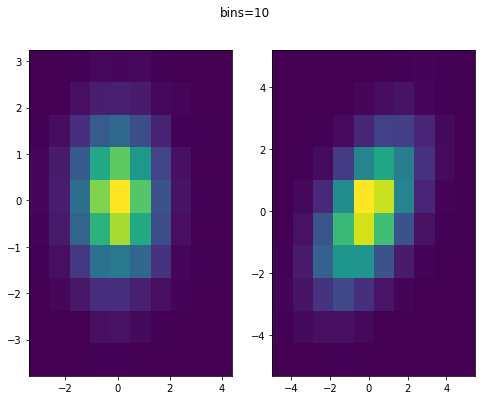

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 6)
ax1.hist2d(norm_distr2d_1[:, 0], norm_distr2d_1[:, 1], bins=10)
ax2.hist2d(norm_distr2d_2[:, 0], norm_distr2d_2[:, 1], bins=10)
plt.suptitle('bins=10')
plt.show()

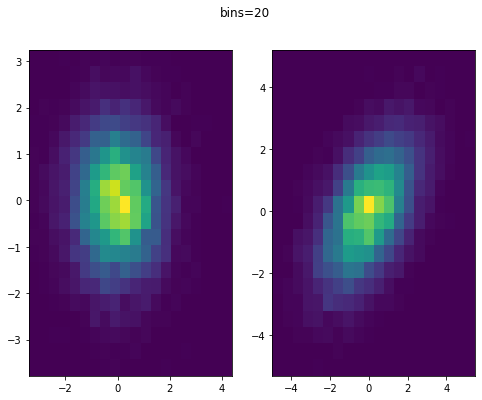

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 6)
ax1.hist2d(norm_distr2d_1[:, 0], norm_distr2d_1[:, 1], bins=20)
ax2.hist2d(norm_distr2d_2[:, 0], norm_distr2d_2[:, 1], bins=20)
plt.suptitle('bins=20')
plt.show()

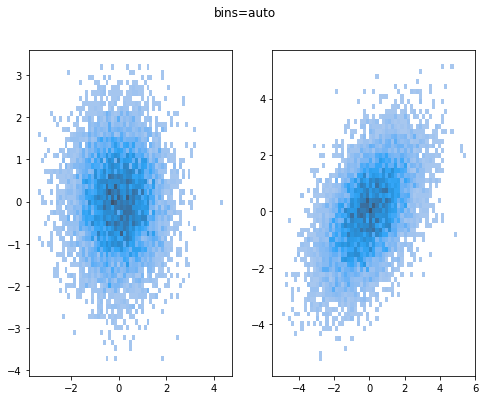

In [11]:
# histograms from seaborn
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 6)
sns.histplot(x=norm_distr2d_1[:, 0], y=norm_distr2d_1[:, 1], ax=ax1)
sns.histplot(x=norm_distr2d_2[:, 0], y=norm_distr2d_2[:, 1], ax=ax2)
plt.suptitle('bins=auto')
plt.show()

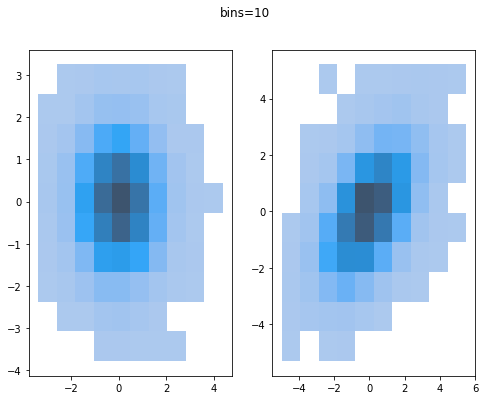

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 6)
sns.histplot(x=norm_distr2d_1[:, 0], y=norm_distr2d_1[:, 1], bins=10, ax=ax1)
sns.histplot(x=norm_distr2d_2[:, 0], y=norm_distr2d_2[:, 1], bins=10, ax=ax2)
plt.suptitle('bins=10')
plt.show()

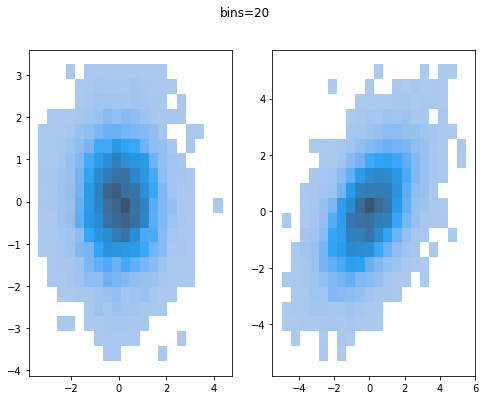

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 6)
sns.histplot(x=norm_distr2d_1[:, 0], y=norm_distr2d_1[:, 1], bins=20, ax=ax1)
sns.histplot(x=norm_distr2d_2[:, 0], y=norm_distr2d_2[:, 1], bins=20, ax=ax2)
plt.suptitle('bins=20')
plt.show()

## 5.Generate 1000 points from the following model ( First sample $\alpha$, $\beta$, x, $\sigma$, then compute $\mu$ algebraically, then sample a value of y. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result)

In [14]:
alpha = np.random.normal(2, 0.1, 1000)
beta = np.random.normal(0.2, 0.2, 1000)
x = np.random.normal(0, 3, 1000)
sigma = np.abs(np.random.normal(0, 1, 1000))
mu = alpha + beta*x
y = np.random.normal(mu, sigma)

## 6.Plot y values as a function of x. Compare them with lines of y = $\alpha$ + $\beta x$, plotted for between -6 and 6 for each of randomly sampled $\alpha$ and $\beta$ pair (on the same plot).

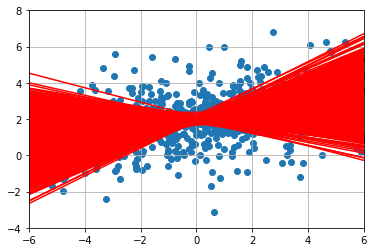

In [15]:
plt.scatter(x, y)
x = np.linspace(-6, 6, 1000)
for a, b in zip(alpha, beta):
    plt.plot(x, a+b*x, 'r')
plt.axis([-6, 6, -4, 8])
plt.grid()
plt.show()